# Лабораторная работа №5

## Ансамбли моделей машинного обучения

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt


# скроем предупреждения о возможных ошибках для лучшей читаемости
import warnings
warnings.filterwarnings('ignore')

target_col = 'class'

In [2]:
data = pd.read_csv('mushrooms.csv')
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


#### Предварительная обработка

In [3]:
#Проверка на пропуски
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Пропусков нет

Категориальные признаки

In [4]:
le = LabelEncoder()
for col in data.columns:
    column_type = data[col].dtype
    if column_type == 'object':
        data[col] = le.fit_transform(data[col]);
        print(col)

class
cap-shape
cap-surface
cap-color
bruises
odor
gill-attachment
gill-spacing
gill-size
gill-color
stalk-shape
stalk-root
stalk-surface-above-ring
stalk-surface-below-ring
stalk-color-above-ring
stalk-color-below-ring
veil-type
veil-color
ring-number
ring-type
spore-print-color
population
habitat


### Обучающая и тестовая выборка

In [5]:
from sklearn.model_selection import train_test_split

data_x = data.loc[:, data.columns != target_col]
data_y = data[target_col]

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.3, random_state=1)

In [6]:
train_x.shape

(5686, 22)

In [7]:
test_x.shape

(2438, 22)

In [8]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error, r2_score, precision_score

def test_model(model):
    print('precision: {}'.format(round(precision_score(test_y, model.predict(test_x)), 2)))

## Обучение моделей

#### Случайный лес

In [10]:
from sklearn.ensemble import RandomForestRegressor

ran_80 = RandomForestRegressor(n_estimators=80)
ran_80.fit(train_x, train_y)

RandomForestRegressor(n_estimators=80)

In [11]:
param_range = np.arange(50, 170, 10)
tuned_parameters = [{'n_estimators': param_range}]
tuned_parameters

[{'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160])}]

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

gs = GridSearchCV(RandomForestRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(data_x, data_y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160])}],
             return_train_score=True, scoring='r2')

In [13]:
reg = gs.best_estimator_

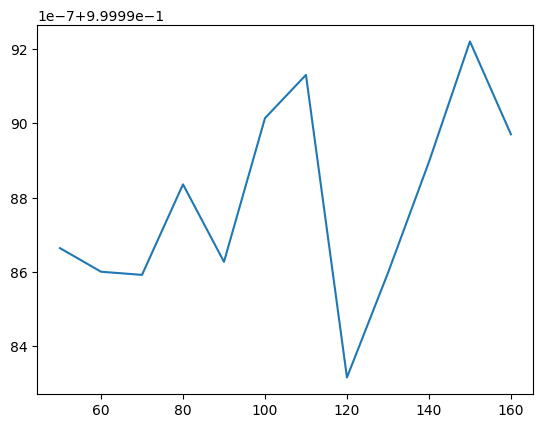

In [14]:
import matplotlib.pyplot as plt

plt.plot(param_range, gs.cv_results_["mean_train_score"]);

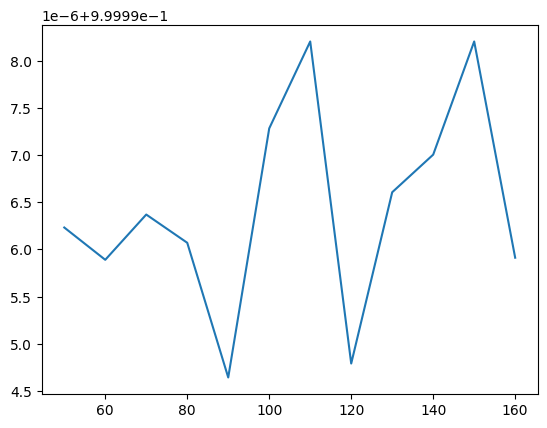

In [15]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [16]:
reg.fit(train_x, train_y)

RandomForestRegressor(n_estimators=150)

### Градиентный бустинг

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

gr_80 = GradientBoostingRegressor(n_estimators=80)
gr_80.fit(train_x, train_y)

GradientBoostingRegressor(n_estimators=80)

In [18]:
gs = GridSearchCV(GradientBoostingRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(data_x, data_y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
             estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid=[{'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160])}],
             return_train_score=True, scoring='r2')

In [19]:
reg = gs.best_estimator_

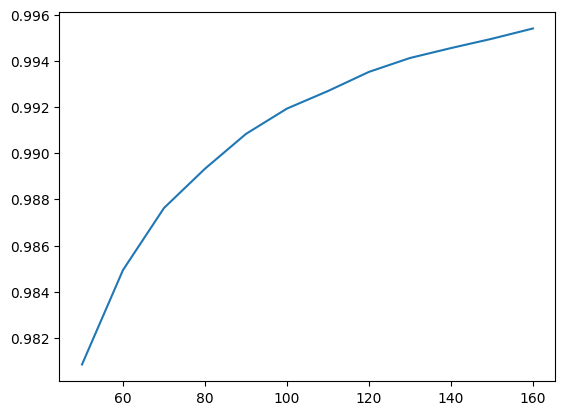

In [20]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

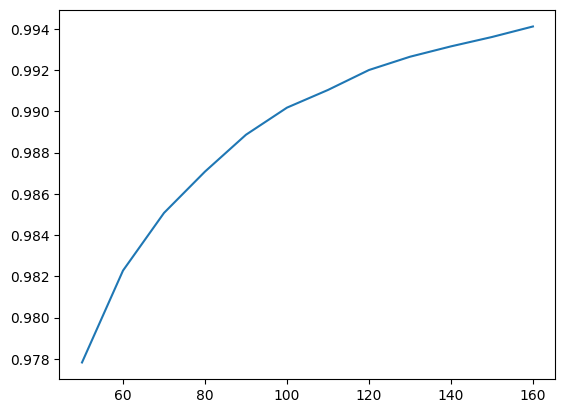

In [21]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [22]:
reg.fit(train_x, train_y)

GradientBoostingRegressor(n_estimators=160)

### Стекинг

In [23]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

base_learners = [
                 ('rf_1', RandomForestClassifier(n_estimators=10, random_state=42)),
                 ('rf_2', GradientBoostingClassifier(n_estimators=80))             
                ]

clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

clf.fit(train_x, train_y)

StackingClassifier(estimators=[('rf_1',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('rf_2',
                                GradientBoostingClassifier(n_estimators=80))],
                   final_estimator=LogisticRegression())